# Analyse results from simple load test

Make some basic sanity plots from the results produced by running `python scripts/load-test.py fboylu/binder --n-launches 20 --filepath=00_DevelopModel.ipynb`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

import pickle

In [3]:
with open('../results.pkl', 'rb') as f:
    data = pickle.load(f)
    records = data['results']
    gun_time = data['gun_time']

In [4]:
df = pd.DataFrame.from_records(records, index='idx')

In [5]:
df.head()

,end,kernel,notebook,ready,start,status,total_bytes,widgets
idx,,,,,,,,
19,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,success,2449769.0,1.530947e+09
11,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,success,2449769.0,1.530947e+09
0,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,success,2449769.0,1.530947e+09
15,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,success,2449769.0,1.530947e+09
1,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,1.530947e+09,success,2449769.0,1.530947e+09


In [6]:
# time for successful launches
df_sucess = df[df.status == 'success']

In [7]:
df_sucess['total'] = df['end'] - df['start']

/Users/thead/anaconda/envs/jhub/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


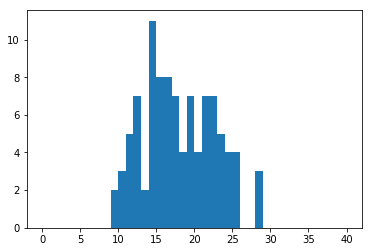

In [8]:
# launch times
plt.hist(df_sucess.total, range=(0, 40), bins=40);

In [9]:
from collections import Counter

In [10]:
# how many failures?
Counter(df['status'])

Counter({'success': 98, 'fail': 2})

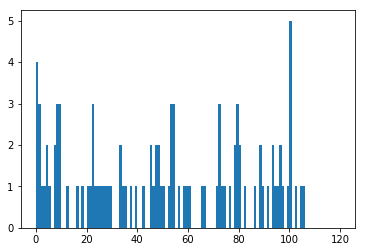

In [12]:
# launch delays/spread, should be between 0 and 10s
plt.hist(df['start'] - gun_time, bins=120, range=(0,120));